# The Moving Average Model

In [2]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_csv("index2018.csv")
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [5]:
data = pd.read_csv("index2018.csv")
ds= data.copy()
ds.date= pd.to_datetime(ds.date,dayfirst=True)
ds.set_index("date",inplace=True)
ds=ds.asfreq('b')
ds= ds.fillna(method='ffill')

In [6]:
ds.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [7]:
ds["returns"]= ds.ftse.pct_change(1)*100

In [8]:
ds.head()

,spx,dax,ftse,nikkei,returns
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44,-0.156704
1994-01-11,474.13,2228.10,3413.77,18485.25,-0.779229
1994-01-12,474.17,2182.06,3372.02,18793.88,-1.222988
1994-01-13,472.47,2142.37,3360.01,18577.26,-0.356166


In [9]:
from statsmodels.tsa.arima_model import ARMA

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
mod_ma1 = ARMA(ds.returns[1:],order=(0,1)) 

#ds.returns[1:] , we have taken from 1 coz ar 1st there is NAN, 
                  #since we didn't remove 1st row when creating return column
#order=(0,1), the first value 0 shows AR components, the second value 1 shows MA components

In [16]:
mod_ma1 = ARMA(ds.returns[1:],order=(0,1)) 
res_ma1 = mod_ma1.fit()
res_ma1.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52925D+00    |proj g|=  1.50990D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   8.882D-08   1.529D+00
  F =   1.5292539243773764     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 1)   Log Likelihood               -9597.598
Method:                       css-mle   S.D. of innovations              1.117
Date:                Fri, 01 Jul 2022   AIC                          19201.195
Time:                        22:00:01   BIC                          19221.429
Sample:                    01-10-1994   HQIC                         19208.206
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.014      1.374      0.169      -0.008       0.046
ma.L1.returns    -0.0196      0.013     -1.467      0.142      -0.046       0.007
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           51.1299           +0.0000j           51.1299            0.0000
-----------------------------------------------------------------------------
"""

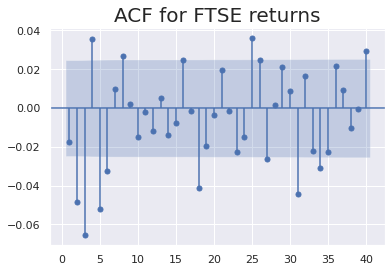

In [25]:
#validate above lag with ACF plot (theta1 is not significantly diff from 0, validatethis)

sgt.plot_acf(ds.returns[1:], zero =False, lags = 40)    
plt.title("ACF for FTSE returns",size = 20)
plt.show()

In [26]:
def MAcomp(lags,dataset):                  #MA model comparison
    models=[("mod_"+str(i+1)) for i in range(lags)]
    result=[("results_ar"+str(i+1)) for i in range(lags)]
    for i in range(lags):  
        models[i] = ARMA(dataset,order=(0,i+1))
        result[i] = models[i].fit()
        print(result[i].summary())
    for j in range(lags-1):
         print(f"COMP model{j+1} and model{j+2}",LLR_test(models[j],models[j+1]))

In [12]:
from scipy.stats.distributions import chi2
def LLR_test(mod_1,mod_2,DF=1):
    L1 = mod_1.fit().llf         #llf returns log likelihood ratio of model
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))             
    p = chi2.sf(LR,DF).round(3)  #use chi sqr to find p value if diff in log likelihood is significant
    return p

In [42]:
MAcomp(10,ds.returns[1:])

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52925D+00    |proj g|=  1.50990D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   8.882D-08   1.529D+00
  F =   1.5292539243773764     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 1

 This problem is unconstrained.


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 3)   Log Likelihood               -9573.494
Method:                       css-mle   S.D. of innovations              1.112
Date:                Fri, 01 Jul 2022   AIC                          19156.988
Time:                        07:34:30   BIC                          19190.710
Sample:                    01-10-1994   HQIC                         19168.672
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.587      0.113      -0.004       0.043
ma.L1.returns    -0.0175      0.013     -1.381      0.167      -0.042       0.007
ma.L2.returns    -0.0539      0.012     

 This problem is unconstrained.


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 4)   Log Likelihood               -9570.420
Method:                       css-mle   S.D. of innovations              1.112
Date:                Fri, 01 Jul 2022   AIC                          19152.840
Time:                        07:34:31   BIC                          19193.307
Sample:                    01-10-1994   HQIC                         19166.861
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.533      0.125      -0.005       0.043
ma.L1.returns    -0.0169      0.013     -1.342      0.180      -0.042       0.008
ma.L2.returns    -0.0540      0.013     

 This problem is unconstrained.


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 5)   Log Likelihood               -9562.650
Method:                       css-mle   S.D. of innovations              1.110
Date:                Fri, 01 Jul 2022   AIC                          19139.300
Time:                        07:34:33   BIC                          19186.511
Sample:                    01-10-1994   HQIC                         19155.658
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.617      0.106      -0.004       0.042
ma.L1.returns    -0.0214      0.013     -1.691      0.091      -0.046       0.003
ma.L2.returns    -0.0494      0.013     

 This problem is unconstrained.



At iterate    5    f=  1.52325D+00    |proj g|=  6.66134D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     10      1     0     0   4.441D-08   1.523D+00
  F =   1.5232456383563071     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 6)   Log Likelihood               -9559.890
Method:                       css-mle   S.D. of innovations              1.110
Date:                Fri, 01 Jul 2022   AIC  

 This problem is unconstrained.



At iterate    5    f=  1.52322D+00    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     10      1     0     0   2.220D-08   1.523D+00
  F =   1.5232177780560869     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 7)   Log Likelihood               -9559.715
Method:                       css-mle   S.D. of innovations              1.110
Date:                Fri, 01 Jul 2022   AIC  

 This problem is unconstrained.



At iterate    5    f=  1.52288D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6      9      1     0     0   2.220D-08   1.523D+00
  F =   1.5228826431427109     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 8)   Log Likelihood               -9557.611
Method:                       css-mle   S.D. of innovations              1.110
Date:                Fri, 01 Jul 2022   AIC  

 This problem is unconstrained.



At iterate    5    f=  1.52288D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5      8      1     0     0   4.441D-08   1.523D+00
  F =   1.5228780684509318     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 9)   Log Likelihood               -9557.583
Method:                       css-mle   S.D. of innovations              1.110
Date:                Fri, 01 Jul 2022   AIC  

 This problem is unconstrained.



At iterate    5    f=  1.52279D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      6      9      1     0     0   4.441D-08   1.523D+00
  F =   1.5227899923374106     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                    ARMA(0, 10)   Log Likelihood               -9557.030
Method:                       css-mle   S.D. of innovations              1.109
Date:                Fri, 01 Jul 2022   AIC  

 This problem is unconstrained.
 This problem is unconstrained.


COMP model1 and model2 0.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52802D+00    |proj g|=  4.84057D-06

At iterate    5    f=  1.52802D+00    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      8      1     0     0   2.220D-08   1.528D+00
  F =   1.5280176400683803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52541D+00    |proj g|=  5.50671D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4      6      1     0     0   4.441D-08   1.525D+00
  F =   1.5254132822890329     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model2 and model3 0.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52492D+00    |proj g|=  1.40554D-05

At iterate    5    f=  1.52492D+00    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5      8      1     0     0   2.220D-08   1.525D+00
  F =   1.5249235188720758     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


COMP model3 and model4 0.013
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52492D+00    |proj g|=  1.40554D-05

At iterate    5    f=  1.52492D+00    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5      8      1     0     0   2.220D-08   1.525D+00
  F =   1.5249235188720758     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52369D+00    |proj g|=  1.84075D-05

At iterate    5    f=  1.52369D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5      8      1     0     0   4.441D-08   1.524D+00
  F =   1.5236854482426785     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model4 and model5 0.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =     

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52325D+00    |proj g|=  1.62315D-05

At iterate    5    f=  1.52325D+00    |proj g|=  6.66134D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     10      1     0     0   4.441D-08   1.523D+00
  F =   1.5232456383563071     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


COMP model5 and model6 0.019
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52325D+00    |proj g|=  1.62315D-05

At iterate    5    f=  1.52325D+00    |proj g|=  6.66134D-08


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     10      1     0     0   4.441D-08   1.523D+00
  F =   1.5232456383563071     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52322D+00    |proj g|=  1.61426D-05

At iterate    5    f=  1.52322D+00    |proj g|=  2.22045D-08


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     10      1     0     0   2.220D-08   1.523D+00
  F =   1.5232177780560869     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model6 and model7 0.554
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52322D+00    |proj g|=  1.61426D-05


 This problem is unconstrained.



At iterate    5    f=  1.52322D+00    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     10      1     0     0   2.220D-08   1.523D+00
  F =   1.5232177780560869     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52288D+00    |proj g|=  1.71640D-05


 This problem is unconstrained.



At iterate    5    f=  1.52288D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6      9      1     0     0   2.220D-08   1.523D+00
  F =   1.5228826431427109     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model7 and model8 0.04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52288D+00    |proj g|=  1.71640D-05


 This problem is unconstrained.



At iterate    5    f=  1.52288D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6      9      1     0     0   2.220D-08   1.523D+00
  F =   1.5228826431427109     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52288D+00    |proj g|=  1.75193D-05


 This problem is unconstrained.



At iterate    5    f=  1.52288D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5      8      1     0     0   4.441D-08   1.523D+00
  F =   1.5228780684509318     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model8 and model9 0.811
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52288D+00    |proj g|=  1.75193D-05


 This problem is unconstrained.



At iterate    5    f=  1.52288D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5      8      1     0     0   4.441D-08   1.523D+00
  F =   1.5228780684509318     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52279D+00    |proj g|=  1.84963D-05


 This problem is unconstrained.



At iterate    5    f=  1.52279D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      6      9      1     0     0   4.441D-08   1.523D+00
  F =   1.5227899923374106     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model9 and model10 0.293


In [ ]:
looking at the log likelyhood and p values of the lags

MA(2)>MA(1),MA(3)>MA(2),MA(4)>MA(3){concluded by both p value and llr},....
MA(6)>MA(7), so we choose MA(6).

WE choose MA(6) according this rule. But sometimes by looking at the values and ACF we can 
find better performance of some models than MA(6).
Looking at ACF plot MA(8)>MA(7) seems most significant. lets do the LLR test to find out if
MA(8)>MA(6)

looking at ACF plot (9,10,11,..19) doesn't look significant

In [43]:
mod_MA6 = ARMA(ds.returns[1:],order=(0,6))
res_MA6 = mod_MA6.fit()
print(res_MA6.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52325D+00    |proj g|=  1.62315D-05

At iterate    5    f=  1.52325D+00    |proj g|=  6.66134D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     10      1     0     0   4.441D-08   1.523D+00
  F =   1.5232456383563071     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 6)   Log Likelihood               -9559.890
Method:                       css-mle   S.D. of innovations              1.110
Date:                Fri, 01 Jul 2022   AIC                          19135.779
Time:                        07:48:31   BIC                          19189.735
Sample:                    01-10-1994   HQIC                         19154.474
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.011      1.668      0.095      -0.003       0.041
ma.L1.returns    -0.0194      0.013     -1.542      0.123      -0.044       0.005
ma.L2.returns    -0.0487      0.013     

In [17]:
mod_MA8 = ARMA(ds.returns[1:],order=(0,8))
res_MA8 = mod_MA8.fit()
print(res_MA8.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52288D+00    |proj g|=  1.71640D-05


 This problem is unconstrained.



At iterate    5    f=  1.52288D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6      9      1     0     0   2.220D-08   1.523D+00
  F =   1.5228826431427109     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 8)   Log Likelihood               -9557.611
Method:                       css-mle   S.D. of innovations              1.110
Date:                Fri, 01 Jul 2022   AIC  

In [ ]:
## log likelyhood of MA(6) and MA(2)

In [46]:
LLR_test(mod_MA6,mod_MA8,DF=2) # since MA(8) has 8 variables which is 2 greater than MA(6)
                                

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52325D+00    |proj g|=  1.62315D-05

At iterate    5    f=  1.52325D+00    |proj g|=  6.66134D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     10      1     0     0   4.441D-08   1.523D+00
  F =   1.5232456383563071     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52288D+00    |proj g|=  1.71640D-05


 This problem is unconstrained.



At iterate    5    f=  1.52288D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6      9      1     0     0   2.220D-08   1.523D+00
  F =   1.5228826431427109     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


0.102

### Residual of returns

In [18]:
ds["res_ret_MA"]=res_MA8.resid[1:]    #so 1st values of the column will be NAN

In [19]:
print(f"Mean:{round(ds.res_ret_MA.mean(),3)},Variance:{round(ds.res_ret_MA.var(),3)}")

Mean:-0.0,Variance:1.231


In [21]:
#std deviation is sqr of variance
round(pow(ds.res_ret_MA.var(),2),3)

1.516

Text(0.5, 1.0, 'Residuals of Returns')

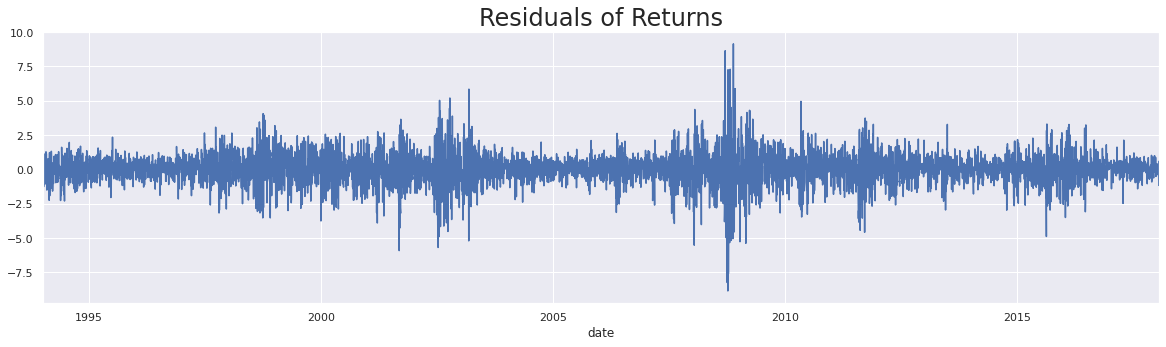

In [25]:
ds.res_ret_MA[1:].plot(figsize=(20,5))
plt.title("Residuals of Returns",size = 24)

In [28]:
sts.adfuller(ds.res_ret_MA[2:])       #since 1st two values are NAN

(-79.20645611038424,
 0.0,
 0,
 6274,
 {'1%': -3.4313927123850956,
  '5%': -2.8620007867175294,
  '10%': -2.5670152737839897},
 19024.102543866473)

In [29]:
ds.head()

,spx,dax,ftse,nikkei,returns,res_ret_MA
date,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44,-0.156704,NaN
1994-01-11,474.13,2228.10,3413.77,18485.25,-0.779229,-0.801335
1994-01-12,474.17,2182.06,3372.02,18793.88,-1.222988,-1.265052
1994-01-13,472.47,2142.37,3360.01,18577.26,-0.356166,-0.452873


## MA Models for Normalized Returns

In [30]:
bench_ret = ds.returns.iloc[1]
ds['norm_ret'] = ds.returns.div(bench_ret)*100

In [31]:
ds

,spx,dax,ftse,nikkei,returns,res_ret_MA,norm_ret
date,,,,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01,NaN,NaN,NaN
1994-01-10,475.270000,2225.00,3440.580000,18443.44,-0.156704,NaN,100.000000
1994-01-11,474.130000,2228.10,3413.770000,18485.25,-0.779229,-0.801335,497.260711
1994-01-12,474.170000,2182.06,3372.020000,18793.88,-1.222988,-1.265052,780.443046
1994-01-13,472.470000,2142.37,3360.010000,18577.26,-0.356166,-0.452873,227.285567
...,...,...,...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15,0.212382,0.173744,-135.530649
2018-01-24,2837.544008,13414.74,7643.428966,23940.78,-1.143311,-1.167884,729.597320
2018-01-25,2839.253031,13298.36,7615.839954,23669.49,-0.360951,-0.449156,230.338698


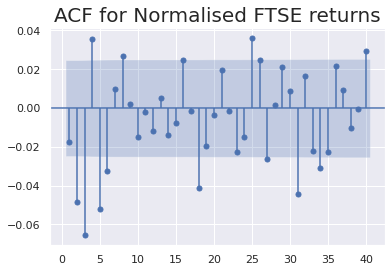

In [33]:
sgt.plot_acf(ds.norm_ret[1:], zero =False, lags = 40)   
plt.title("ACF for Normalised FTSE returns",size = 20)
plt.show()

here also ACF graph recommends MA6 or MA8. (similat to ACF plot of ftse returns)

In [34]:
mod_MA8 = ARMA(ds.norm_ret[1:],order=(0,8))
res_MA8 = mod_MA8.fit()
print(res_MA8.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.98145D+00    |proj g|=  1.72307D-05


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      3      6      1     0     0   8.882D-08   7.981D+00
  F =   7.9814473034043933     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:               norm_ret   No. Observations:                 6276
Model:                     ARMA(0, 8)   Log Likelihood              -50091.563
Method:                       css-mle   S.D. of innovations            708.043
Date:                Sat, 02 Jul 2022   AIC                         100203.127
Time:                       

The p value of lags are similar to the ftse returns. so normalisation doesn't 
affect model selection

In [36]:
ds["res_norm_ret"]=res_MA8.resid[1:]

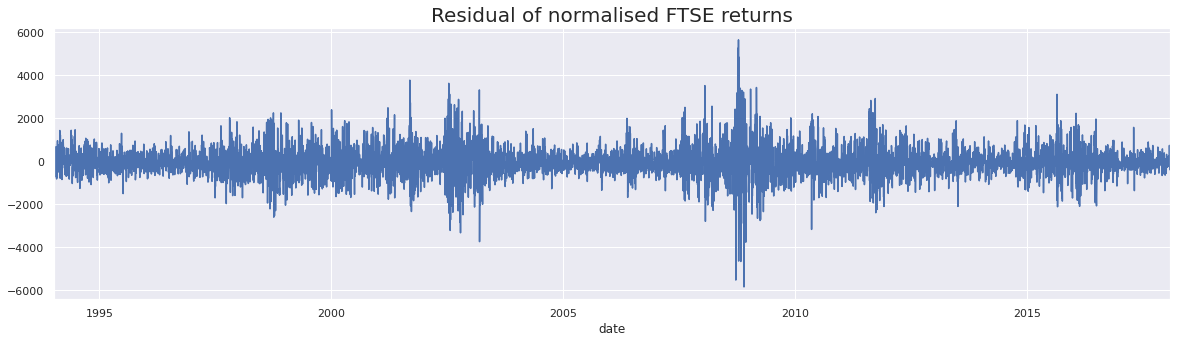

In [37]:
ds.res_norm_ret[1:].plot(figsize=(20,5))
plt.title("Residual of normalised FTSE returns",size=20)
plt.show()

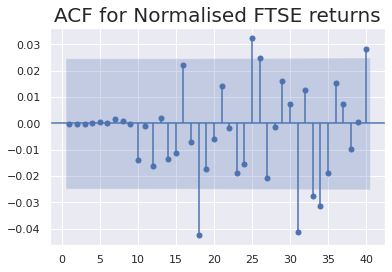

In [39]:
sgt.plot_acf(ds.res_norm_ret[2:], zero =False, lags = 40)   
plt.title("ACF for Normalised FTSE returns",size = 20)
plt.show()

ACF and the plot show that data resembles white noise, which should be for residuals

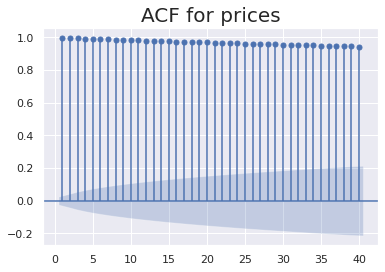

In [42]:
sgt.plot_acf(ds.ftse,zero = False, lags=40)
plt.title("ACF for prices",size=20)
plt.show()

In [43]:
mod_ma1 = ARMA(ds.ftse[1:],order=(0,1)) 
res_ma1 = mod_ma1.fit()
res_ma1.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.80593D+00    |proj g|=  2.88418D-03


 This problem is unconstrained.



At iterate    5    f=  7.80581D+00    |proj g|=  6.21725D-05

At iterate   10    f=  7.80581D+00    |proj g|=  1.02141D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     23      1     0     0   0.000D+00   7.806D+00
  F =   7.8058059849849011     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6276
Model:                     ARMA(0, 1)   Log Likelihood              -48989.238
Method:                       css-mle   S.D. of innovations            593.868
Date:                Sat, 02 Jul 2022   AIC                          97984.477
Time:                        07:27:49   BIC                          98004.710
Sample:                    01-10-1994   HQIC                         97991.487
                         - 01-29-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5424.0365     14.721    368.458      0.000    5395.184    5452.889
ma.L1.ftse     0.9639      0.002    411.391      0.000       0.959       0.968
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0374           +0.0000j            1.0374            0.5000
-----------------------------------------------------------------------------
"""

we see coef of lag1 is close to 1 which means it tries to include almost entire magnitude 
of the error in the model.
The error term contains all model from other lag.

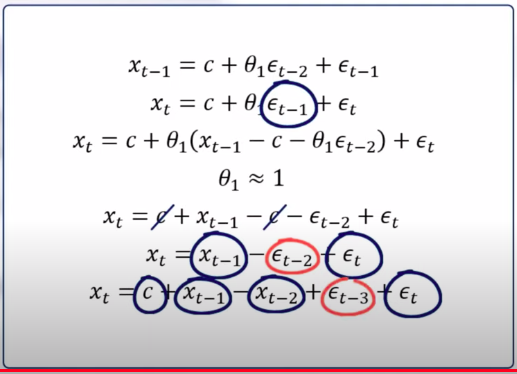

# ARMA Model

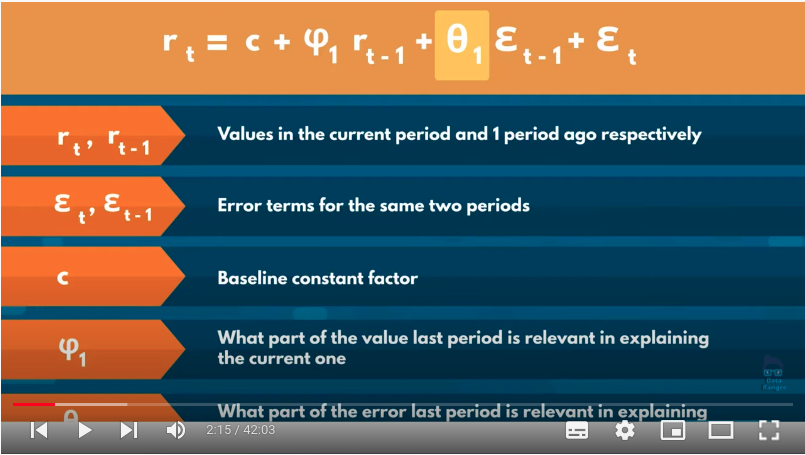

In [ ]:
mod_ar1_ma1 = ARMA(ds.returns[1:],order=(1,1)) # order=(AR,MA) , it is not necessary for 
                                               #AR order and MA value to be equal 

In [12]:
mod_ar1_ma1 = ARMA(ds.returns[1:],order=(1,1))      
res_ar1_ma1 = mod_ar1_ma1.fit()
res_ar1_ma1.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52682D+00    |proj g|=  2.04903D-04

At iterate    5    f=  1.52682D+00    |proj g|=  4.72955D-06


 This problem is unconstrained.



At iterate   10    f=  1.52682D+00    |proj g|=  9.89653D-05

At iterate   15    f=  1.52682D+00    |proj g|=  2.22045D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     19      1     0     0   2.442D-07   1.527D+00
  F =   1.5268227290035905     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(1, 1)   Log Likelihood               -9582.339
Method:                       css-mle   S.D. of innovations              1.114
Date:                Sat, 02 Jul 2022   AIC                          19172.679
Time:                        18:50:53   BIC                          19199.657
Sample:                    01-10-1994   HQIC                         19182.026
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.011      1.753      0.080      -0.002       0.040
ar.L1.returns     0.8177      0.063     12.964      0.000       0.694       0.941
ma.L1.returns    -0.8593      0.056    -15.284      0.000      -0.970      -0.749
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2229           +0.0000j            1.2229            0.0000
MA.1            1.1637           +0.0000j            1.1637            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
p value if const  is 0.080(>0.05), means it is close to zero, since returns
should be near zero it will accepted. 


In [14]:
mod_ret_ar1 = ARMA(ds.returns[1:],order=(1,0)) 
mod_ret_ma1 = ARMA(ds.returns[1:],order=(0,1)) 

In [19]:
print("ARMA vs AR1",LLR_test(mod_ret_ar1,mod_ar1_ma1))
print("ARMA vs MA1",LLR_test(mod_ret_ma1,mod_ar1_ma1))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52927D+00    |proj g|=  2.24709D-05

At iterate    5    f=  1.52927D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      7      1     0     0   0.000D+00   1.529D+00
  F =   1.5292709853141566     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52682D+00    |proj g|=  2.04903D-04

At iterate    5    f=  1.52682D+00    |proj g|=  4.72955D-06


 This problem is unconstrained.



At iterate   10    f=  1.52682D+00    |proj g|=  9.89653D-05

At iterate   15    f=  1.52682D+00    |proj g|=  2.22045D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     19      1     0     0   2.442D-07   1.527D+00
  F =   1.5268227290035905     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARMA vs AR1 0.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52925D+00    |proj g|=  1.50990D-06

           * * *

Tit   = total number of iterations


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52682D+00    |proj g|=  2.04903D-04

At iterate    5    f=  1.52682D+00    |proj g|=  4.72955D-06

At iterate   10    f=  1.52682D+00    |proj g|=  9.89653D-05

At iterate   15    f=  1.52682D+00    |proj g|=  2.22045D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     19      1     0     0   2.442D-07   1.527D+00
  F =   1.5268227290035905     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARMA vs 

In [ ]:
looking at llr test we can say, ARMA model is better that AR and MA individually.

ARMA model takes into account both past values and past errors

In [ ]:
In ARMA model we start with an over parametrized model and then we statt dec the no of lags
until we find the simplest model with
- all significant coef
- High log likelihood
- Low information criteria

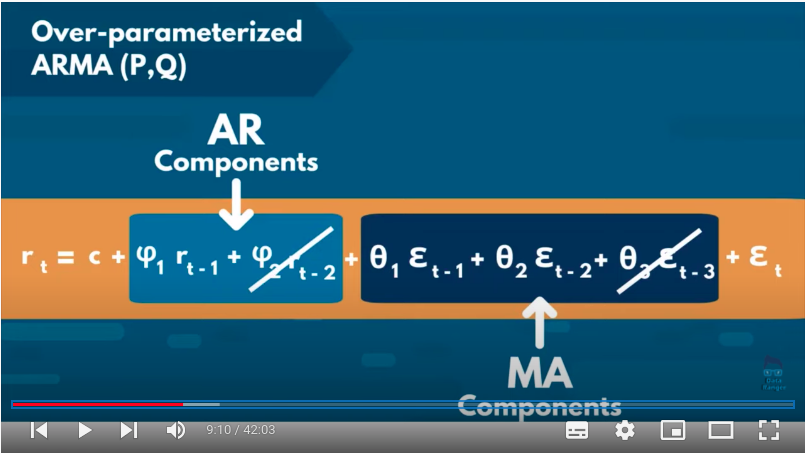

In [20]:
#ARMA (8,6)

mod_ar8_ma6 = ARMA(ds.returns[1:],order=(8,6))      
res_ar8_ma6 = mod_ar8_ma6.fit()
res_ar8_ma6.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52218D+00    |proj g|=  9.39893D-04

At iterate    5    f=  1.52217D+00    |proj g|=  1.73466D-03

At iterate   10    f=  1.52217D+00    |proj g|=  5.75073D-04

At iterate   15    f=  1.52217D+00    |proj g|=  4.48241D-04

At iterate   20    f=  1.52215D+00    |proj g|=  5.19340D-04

At iterate   25    f=  1.52214D+00    |proj g|=  1.30762D-04

At iterate   30    f=  1.52214D+00    |proj g|=  6.69487D-04

At iterate   35    f=  1.52213D+00    |proj g|=  5.62639D-04

At iterate   40    f=  1.52213D+00    |proj g|=  9.17266D-05

At iterate   45    f=  1.52213D+00    |proj g|=  1.89848D-05

At iterate   50    f=  1.52213D+00    |proj g|=  9.79217D-05

At iterate   55    f=  1.52213D+00    |proj g|=  1.04170D-03

At iterate   60    f=  1.52213D+00    |proj g|=  5.04352D-04

At iterate   65    f=  1.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(8, 6)   Log Likelihood               -9551.325
Method:                       css-mle   S.D. of innovations              1.108
Date:                Sun, 03 Jul 2022   AIC                          19134.651
Time:                        07:06:44   BIC                          19242.562
Sample:                    01-10-1994   HQIC                         19172.040
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.010      1.855      0.064      -0.001       0.039
ar.L1.returns    -1.0866      0.270     -4.027      0.000      -1.615      -0.558
ar.L2.returns    -0.4679      0.230     -2.031      0.042      -0.919      -0.016
ar.L3.returns    -0.1799      0.173     -1.042      0.297      -0.518       0.158
ar.L4.returns     0.3807      0.131      2.909      0.004       0.124       0.637
ar.L5.returns     0.9950      0.173      5.757      0.000       0.656       1.334
ar.L6.returns     0.3519      0.201      1.747      0.081      -0.043       0.747
ar.L7.returns     0.0422      0.031      1.382      0.167      -0.018       0.102
ar.L8.returns     0.0589      0.018      3.346      0.001       0.024       0.093
ma.L1.returns     1.0671      0.270      3.955      0.000       0.538       1.596
ma.L2.returns     0.3986      0.224      1.776      0.076      -0.041       0.839
ma.L3.returns     0.0505      0.157      0.322      0.747      -0.257       0.357
ma.L4.returns    -0.4464      0.113     -3.935      0.000      -0.669      -0.224
ma.L5.returns    -1.0317      0.172     -6.009      0.000      -1.368      -0.695
ma.L6.returns    -0.3738      0.204     -1.830      0.067      -0.774       0.027
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1008           -0.0000j            1.1008           -0.0000
AR.2            0.0911           -1.0253j            1.0294           -0.2359
AR.3            0.0911           +1.0253j            1.0294            0.2359
AR.4           -0.9105           -0.4646j            1.0222           -0.4249
AR.5           -0.9105           +0.4646j            1.0222            0.4249
AR.6           -1.6627           -0.0000j            1.6627           -0.5000
AR.7            0.7422           -2.7978j            2.8946           -0.2087
AR.8            0.7422           +2.7978j            2.8946            0.2087
MA.1            1.0766           -0.0000j            1.0766           -0.0000
MA.2            0.1030           -1.0287j            1.0338           -0.2341
MA.3            0.1030           +1.0287j            1.0338            0.2341
MA.4           -0.9086           -0.4683j            1.0221           -0.4243
MA.5           -0.9086           +0.4683j            1.0221            0.4243
MA.6           -2.2253           -0.0000j            2.2253           -0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
we see c is >0.05 which is ok for returns,
but out of 14, 8 coeff are significantly diff from 0
5 in ar and 3 in ma

so we will start with ARMA(5,3), we will try diff combinations of ar till 5 and ma till 3.


In [28]:
def ARMAcomp(ar,ma,dataset):                  #ARMA model comparison
    models=[[f"mod_ar{str(i+1)}_ma{str(j+1)}" for j in range(3)] for i in range(5)]
    result=[[f"results_ar{str(i+1)}_ma{str(j+1)}" for j in range(3)] for i in range(5)]
    for i in range(ar):  
        for j in range(ma):
            models[i][j] = ARMA(dataset,order=(i+1,j+1))
            #print(i,j)
            result[i][j] = models[i][j].fit()
            print(result[i][j].summary())
    for i in range(ar):
        for j in range(ma-1):
            print(f"mod_ar{str(i+1)}_ma{str(j+1)} and mod_ar{str(i+1)}_ma{str(j+2)}",LLR_test(models[i][j],models[i][j+1]))
        #print(f"COMP model{j+1} and model{j+2}",LLR_test(models[j],models[j+1]))

In [29]:
ARMAcomp(5,3,ds.returns[2:])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52691D+00    |proj g|=  4.67870D-04

At iterate    5    f=  1.52691D+00    |proj g|=  6.47304D-04


 This problem is unconstrained.



At iterate   10    f=  1.52690D+00    |proj g|=  6.69265D-04

At iterate   15    f=  1.52690D+00    |proj g|=  2.66454D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     24      1     0     0   2.220D-08   1.527D+00
  F =   1.5268997030501041     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6275
Model:                     ARMA(1, 1)   Log Likelihood               -9581.296
Method:                       css-mle   S.D. of innovations   

 This problem is unconstrained.



At iterate   10    f=  1.52642D+00    |proj g|=  2.51243D-04

At iterate   15    f=  1.52642D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     22      1     0     0   4.441D-08   1.526D+00
  F =   1.5264169735394766     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6275
Model:                     ARMA(1, 2)   Log Likelihood               -9578.267
Method:                       css-mle   S.D. of innovations   

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     18      1     0     0   2.220D-08   1.525D+00
  F =   1.5245856340245774     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6275
Model:                     ARMA(1, 3)   Log Likelihood               -9566.775
Method:                       css-mle   S.D. of innovations              1.111
Date:                Mon, 04 Jul 2022   AIC                          19145.550
Time:                       

 This problem is unconstrained.



At iterate   15    f=  1.52640D+00    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     24      1     0     0   4.441D-08   1.526D+00
  F =   1.5263955914790965     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6275
Model:                     ARMA(2, 1)   Log Likelihood               -9578.132
Method:                       css-mle   S.D. of innovations              1.113
Date:                Mon, 04 Jul 2022   AIC  

 This problem is unconstrained.



At iterate   15    f=  1.52638D+00    |proj g|=  2.01905D-04

At iterate   20    f=  1.52638D+00    |proj g|=  1.39222D-05

At iterate   25    f=  1.52638D+00    |proj g|=  6.66134D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     33      1     0     0   6.661D-08   1.526D+00
  F =   1.5263795001717113     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6275
Model:                     ARMA(2, 2)   Log Likelihood               -9578.031


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52458D+00    |proj g|=  1.65845D-04

At iterate    5    f=  1.52458D+00    |proj g|=  5.20828D-04

At iterate   10    f=  1.52457D+00    |proj g|=  5.62661D-05

At iterate   15    f=  1.52457D+00    |proj g|=  3.23963D-04

At iterate   20    f=  1.52457D+00    |proj g|=  5.23803D-05

At iterate   25    f=  1.52457D+00    |proj g|=  2.26485D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     32      1     0     0   

 This problem is unconstrained.



At iterate   10    f=  1.52494D+00    |proj g|=  3.98126D-05

At iterate   15    f=  1.52494D+00    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     19      1     0     0   4.441D-08   1.525D+00
  F =   1.5249419753158653     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6275
Model:                     ARMA(3, 1)   Log Likelihood               -9569.011
Method:                       css-mle   S.D. of innovations   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52475D+00    |proj g|=  3.08709D-04

At iterate    5    f=  1.52475D+00    |proj g|=  1.29741D-04

At iterate   10    f=  1.52475D+00    |proj g|=  4.23661D-05

At iterate   15    f=  1.52475D+00    |proj g|=  9.53460D-05

At iterate   20    f=  1.52475D+00    |proj g|=  5.75096D-06

At iterate   25    f=  1.52475D+00    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     29      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52412D+00    |proj g|=  3.60467D-04

At iterate    5    f=  1.52412D+00    |proj g|=  3.83471D-04

At iterate   10    f=  1.52411D+00    |proj g|=  1.32758D-03

At iterate   15    f=  1.52411D+00    |proj g|=  2.46470D-05

At iterate   20    f=  1.52411D+00    |proj g|=  2.43583D-05

At iterate   25    f=  1.52411D+00    |proj g|=  2.33147D-05

At iterate   30    f=  1.52411D+00    |proj g|=  2.85993D-05

At iterate   35    f=  1.52411D+00    |proj g|=  2.26263D-05

At iterate   40    f=  1.52411D+00    |proj g|=  3.33067D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   10    f=  1.52492D+00    |proj g|=  1.78213D-04

At iterate   15    f=  1.52492D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     23      1     0     0   6.661D-08   1.525D+00
  F =   1.5249170569571187     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6275
Model:                     ARMA(4, 1)   Log Likelihood               -9568.855
Method:                       css-mle   S.D. of innovations   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52430D+00    |proj g|=  3.69260D-04

At iterate    5    f=  1.52430D+00    |proj g|=  3.17413D-04

At iterate   10    f=  1.52428D+00    |proj g|=  8.11085D-04

At iterate   15    f=  1.52428D+00    |proj g|=  2.94831D-04

At iterate   20    f=  1.52424D+00    |proj g|=  1.65308D-03

At iterate   25    f=  1.52424D+00    |proj g|=  7.57172D-06

At iterate   30    f=  1.52424D+00    |proj g|=  6.66134D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52371D+00    |proj g|=  7.97362D-05

At iterate    5    f=  1.52371D+00    |proj g|=  3.07532D-05

At iterate   10    f=  1.52371D+00    |proj g|=  1.62714D-04

At iterate   15    f=  1.52371D+00    |proj g|=  9.14380D-05

At iterate   20    f=  1.52371D+00    |proj g|=  3.24185D-06

At iterate   25    f=  1.52371D+00    |proj g|=  5.67546D-05

At iterate   30    f=  1.52371D+00    |proj g|=  2.06057D-05

At iterate   35    f=  1.52371D+00    |proj g|=  1.06581D-06

At iterate   40    f=  1.52371D+00    |proj g|=  1.11022D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52333D+00    |proj g|=  1.30584D-04

At iterate    5    f=  1.52333D+00    |proj g|=  1.03695D-05

At iterate   10    f=  1.52333D+00    |proj g|=  3.13527D-05

At iterate   15    f=  1.52333D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     17     23      1     0     0   1.998D-07   1.523D+00
  F =   1.5233328730310944     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
        

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52290D+00    |proj g|=  2.58327D-04

At iterate    5    f=  1.52290D+00    |proj g|=  1.46794D-04

At iterate   10    f=  1.52290D+00    |proj g|=  3.83360D-04

At iterate   15    f=  1.52290D+00    |proj g|=  5.43787D-05

At iterate   20    f=  1.52290D+00    |proj g|=  3.39506D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     24     31      1     0     0   8.882D-08   1.523D+00
  F =   1.5229003344795655     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52290D+00    |proj g|=  2.49600D-04

At iterate    5    f=  1.52290D+00    |proj g|=  2.00040D-04

At iterate   10    f=  1.52290D+00    |proj g|=  4.12581D-04

At iterate   15    f=  1.52290D+00    |proj g|=  1.14797D-04

At iterate   20    f=  1.52290D+00    |proj g|=  4.41203D-05

At iterate   25    f=  1.52290D+00    |proj g|=  1.34115D-05

At iterate   30    f=  1.52290D+00    |proj g|=  1.02141D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   10    f=  1.52690D+00    |proj g|=  6.69265D-04

At iterate   15    f=  1.52690D+00    |proj g|=  2.66454D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     24      1     0     0   2.220D-08   1.527D+00
  F =   1.5268997030501041     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52642D+00    |proj g|=  3.20344D-04

At iterate    5    f=  1.52642D+00    |proj g|=  1.59117D-04


 This problem is unconstrained.



At iterate   10    f=  1.52642D+00    |proj g|=  2.51243D-04

At iterate   15    f=  1.52642D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     22      1     0     0   4.441D-08   1.526D+00
  F =   1.5264169735394766     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
mod_ar1_ma1 and mod_ar1_ma2 0.014
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52642D+00    |proj g|=  3.20344D-04

At iterate    5    f=  1.52642D+00 

 This problem is unconstrained.



At iterate   10    f=  1.52642D+00    |proj g|=  2.51243D-04

At iterate   15    f=  1.52642D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     22      1     0     0   4.441D-08   1.526D+00
  F =   1.5264169735394766     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52459D+00    |proj g|=  6.47038D-05

At iterate    5    f=  1.52459D+00    |proj g|=  6.43485D-05

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     18      1     0     0   2.220D-08   1.525D+00
  F =   1.5245856340245774     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
mod_ar1_ma2 and mod_ar1_ma3 0.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52642D+00    |proj g|=  4.27391D-04

At iterate    5    f=  1.52642D+00    |proj g|=  8.67661D-04

At iterate   10    f=  1.52640D+00    |proj g|=  9.02434D-04


 This problem is unconstrained.



At iterate   15    f=  1.52640D+00    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     24      1     0     0   4.441D-08   1.526D+00
  F =   1.5263955914790965     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52641D+00    |proj g|=  4.16223D-04

At iterate    5    f=  1.52640D+00    |proj g|=  1.47913D-03

At iterate   10    f=  1.52638D+00    |proj g|=  9.27702D-05


 This problem is unconstrained.



At iterate   15    f=  1.52638D+00    |proj g|=  2.01905D-04

At iterate   20    f=  1.52638D+00    |proj g|=  1.39222D-05

At iterate   25    f=  1.52638D+00    |proj g|=  6.66134D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     33      1     0     0   6.661D-08   1.526D+00
  F =   1.5263795001717113     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
mod_ar2_ma1 and mod_ar2_ma2 0.653
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52641D+00 

 This problem is unconstrained.



At iterate   15    f=  1.52638D+00    |proj g|=  2.01905D-04

At iterate   20    f=  1.52638D+00    |proj g|=  1.39222D-05

At iterate   25    f=  1.52638D+00    |proj g|=  6.66134D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     33      1     0     0   6.661D-08   1.526D+00
  F =   1.5263795001717113     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52458D+00    |proj g|=  1.65845D-04

At iter

 This problem is unconstrained.



At iterate   15    f=  1.52457D+00    |proj g|=  3.23963D-04

At iterate   20    f=  1.52457D+00    |proj g|=  5.23803D-05

At iterate   25    f=  1.52457D+00    |proj g|=  2.26485D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     32      1     0     0   1.998D-07   1.525D+00
  F =   1.5245688123260650     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
mod_ar2_ma2 and mod_ar2_ma3 0.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52494D+00   

 This problem is unconstrained.



At iterate   10    f=  1.52494D+00    |proj g|=  3.98126D-05

At iterate   15    f=  1.52494D+00    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     19      1     0     0   4.441D-08   1.525D+00
  F =   1.5249419753158653     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52475D+00    |proj g|=  3.08709D-04

At iterate    5    f=  1.52475D+00    |proj g|=  1.29741D-04

At iterate   10    f=  1.52475D+00    |proj g|=  4.23661D-05

At iterate   15    f=  1.52475D+00    |proj g|=  9.53460D-05

At iterate   20    f=  1.52475D+00    |proj g|=  5.75096D-06

At iterate   25    f=  1.52475D+00    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     29      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52475D+00    |proj g|=  3.08709D-04

At iterate    5    f=  1.52475D+00    |proj g|=  1.29741D-04

At iterate   10    f=  1.52475D+00    |proj g|=  4.23661D-05

At iterate   15    f=  1.52475D+00    |proj g|=  9.53460D-05

At iterate   20    f=  1.52475D+00    |proj g|=  5.75096D-06

At iterate   25    f=  1.52475D+00    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     29      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52412D+00    |proj g|=  3.60467D-04

At iterate    5    f=  1.52412D+00    |proj g|=  3.83471D-04

At iterate   10    f=  1.52411D+00    |proj g|=  1.32758D-03

At iterate   15    f=  1.52411D+00    |proj g|=  2.46470D-05

At iterate   20    f=  1.52411D+00    |proj g|=  2.43583D-05

At iterate   25    f=  1.52411D+00    |proj g|=  2.33147D-05

At iterate   30    f=  1.52411D+00    |proj g|=  2.85993D-05

At iterate   35    f=  1.52411D+00    |proj g|=  2.26263D-05

At iterate   40    f=  1.52411D+00    |proj g|=  3.33067D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   10    f=  1.52492D+00    |proj g|=  1.78213D-04

At iterate   15    f=  1.52492D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     23      1     0     0   6.661D-08   1.525D+00
  F =   1.5249170569571187     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52430D+00    |proj g|=  3.69260D-04

At iterate    5    f=  1.52430D+00    |proj g|=  3.17413D-04

At iterate   10    f=  1.52428D+00    |proj g|=  8.11085D-04

At iterate   15    f=  1.52428D+00    |proj g|=  2.94831D-04

At iterate   20    f=  1.52424D+00    |proj g|=  1.65308D-03

At iterate   25    f=  1.52424D+00    |proj g|=  7.57172D-06

At iterate   30    f=  1.52424D+00    |proj g|=  6.66134D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52430D+00    |proj g|=  3.69260D-04

At iterate    5    f=  1.52430D+00    |proj g|=  3.17413D-04

At iterate   10    f=  1.52428D+00    |proj g|=  8.11085D-04

At iterate   15    f=  1.52428D+00    |proj g|=  2.94831D-04

At iterate   20    f=  1.52424D+00    |proj g|=  1.65308D-03

At iterate   25    f=  1.52424D+00    |proj g|=  7.57172D-06

At iterate   30    f=  1.52424D+00    |proj g|=  6.66134D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52371D+00    |proj g|=  7.97362D-05

At iterate    5    f=  1.52371D+00    |proj g|=  3.07532D-05

At iterate   10    f=  1.52371D+00    |proj g|=  1.62714D-04

At iterate   15    f=  1.52371D+00    |proj g|=  9.14380D-05

At iterate   20    f=  1.52371D+00    |proj g|=  3.24185D-06

At iterate   25    f=  1.52371D+00    |proj g|=  5.67546D-05

At iterate   30    f=  1.52371D+00    |proj g|=  2.06057D-05

At iterate   35    f=  1.52371D+00    |proj g|=  1.06581D-06

At iterate   40    f=  1.52371D+00    |proj g|=  1.11022D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   15    f=  1.52333D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     17     23      1     0     0   1.998D-07   1.523D+00
  F =   1.5233328730310944     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52290D+00    |proj g|=  2.58327D-04

At iterate    5    f=  1.52290D+00    |proj g|=  1.46794D-04

At iterate   10    f=  1.52290D+00    |proj g|=  3.83360D-04

At iterate   15    f=  1.52290D+00    |proj g|=  5.43787D-05

At iterate   20    f=  1.52290D+00    |proj g|=  3.39506D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     24     31      1     0     0   8.882D-08   1.523D+00
  F =   1.5229003344795655     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52290D+00    |proj g|=  2.58327D-04

At iterate    5    f=  1.52290D+00    |proj g|=  1.46794D-04

At iterate   10    f=  1.52290D+00    |proj g|=  3.83360D-04

At iterate   15    f=  1.52290D+00    |proj g|=  5.43787D-05

At iterate   20    f=  1.52290D+00    |proj g|=  3.39506D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     24     31      1     0     0   8.882D-08   1.523D+00
  F =   1.5229003344795655     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52290D+00    |proj g|=  2.49600D-04

At iterate    5    f=  1.52290D+00    |proj g|=  2.00040D-04

At iterate   10    f=  1.52290D+00    |proj g|=  4.12581D-04

At iterate   15    f=  1.52290D+00    |proj g|=  1.14797D-04

At iterate   20    f=  1.52290D+00    |proj g|=  4.41203D-05

At iterate   25    f=  1.52290D+00    |proj g|=  1.34115D-05

At iterate   30    f=  1.52290D+00    |proj g|=  1.02141D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [ ]:
# We will see every models p values  and see the llr test values

from llr test

1st row- 1ar,3ma
2nd row- 2ar,1ma vs 2ar,3ma
3rd row- 3ar,ma1 vs 3ar,3ma
4th row- 4ar,3ma
5TH row- 5ar,2ma



In [31]:
a= ARMA(ds[1:],order=(1,3))
ra= a.fit()
print(ra.summary())

ValueError: endog is required to have ndim 1 but has ndim 2

In [25]:
#don't know why it was not running at order=(4,2) at ds.returns[1:]

# models[3][1] = ARMA(ds.returns[1:],order=(3+1,1+1))
# result = models[3][1].fit()
# result.summary()

In [4]:
import pandas as pd
lis=[i for i in range(50)]
lis

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [5]:
pd.Dataframe(lis)

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [ ]:
```````````````````